# What can we do with Fourier Fast Transform (FFT)?

> In this notebook, we use Numpy's implimentation of [Fourier Fast Transform (FFT)](https://numpy.org/doc/stable/reference/routines.fft.html).

> One of the typical applications of FFT is finding the frequencies that construct a signal. Or better, seeing the amount of energy that each frequency carries. The function that contains the information about the energy of each frequency is called power spectrum density, denoted by $S(f)$, and is the square of the Fourier transform coefficients. Mathematically, if $A_f$ is the coefficient correspond to frequency $f$, $S(f)$ is
<h3><center>$S(f) = |A_f|^2 = A_f \times A_f^{*}$,</center></h3>

> where $A_f^{*}$ is the complex conjugate of $A_f$. We will build three different signals and show how FFT works to show how we can do it using the Numpy FFT implementation.

Let us assume we have three frequencies, $f_1=1$, $f_2=4$ and $f_3=7$. For $T=2$ seconds, we sample $256$ points from a sine function we the same frequencies

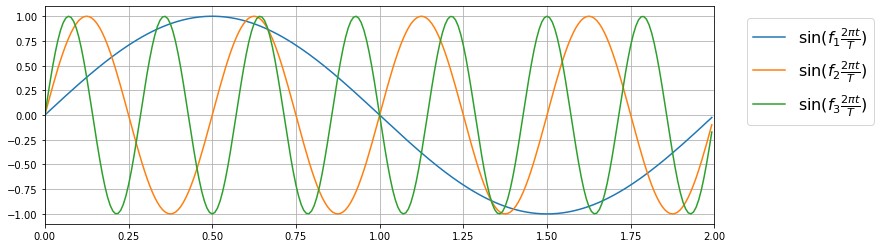

In [27]:
import numpy as np
from matplotlib import pyplot as plt

f1 = 1
f2 = 4
f3 = 7
T = 2
samples = 256

_ = plt.figure(figsize=(12,4))
t = T*np.arange(samples)/samples
s1 = np.sin(f1*2*np.pi*t/T)
s2 = np.sin(f2*2*np.pi*t/T)
s3 = np.sin(f3*2*np.pi*t/T)
plt.plot(t, s1, label=r"$\sin(f_1 \frac{2 \pi t}{T})$")
plt.plot(t, s2, label=r"$\sin(f_2 \frac{2 \pi t}{T})$")
plt.plot(t, s3, label=r"$\sin(f_3 \frac{2 \pi t}{T})$")
plt.xlim([0,2])
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1.25, 0.7), prop={'size': 16})
plt.show()

Next, we construct three signals, by adding the above sines one by one as follow

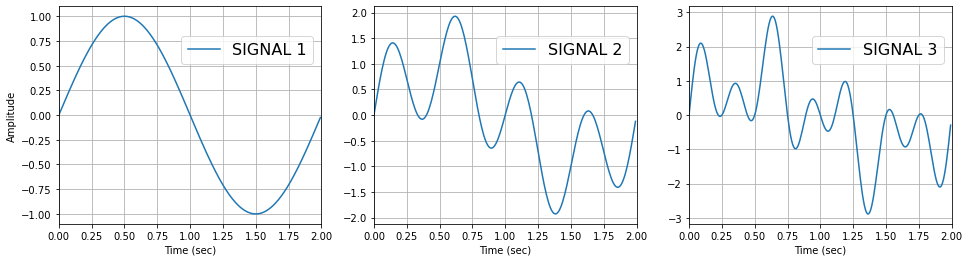

In [51]:
signal_1 = s1
signal_2 = s1 + s2
signal_3 = s1 + s2 + s3


_ = plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(t, signal_1, label=r"SIGNAL 1")
plt.xlim([0,2])
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.subplot(1,3,2)
plt.plot(t, signal_2, label=r"SIGNAL 2")
plt.xlim([0,2])
plt.xlabel("Time (sec)")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.subplot(1,3,3)
plt.plot(t, signal_3, label=r"SIGNAL 3")
plt.xlim([0,2])
plt.xlabel("Time (sec)")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.show()

To find the power density spectrum, we first find the fourier transform of a signal and then multiply it with its complex conjugate, or the square of its module.

Notice that we drop half of the frequencies before plotting them. The second half is equal to the first half since the signal is real-valued. To be more precise, for even signal length, the frequencies are correspond to

<h3><center>$[0, 1, ...,   n/2-1,     -n/2, ..., -1] / (T*sample)$. </center></h3>

The first term is for zero frequency. The next $n/2 - 1$ terms are for positive frequencies, and the remaining are for negative frequencies in decreasing order. We drop all the terms from index $n/2$ to the end.

For more information read numpy's documntation in [here](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html#numpy.fft.fftfreq) and [here](https://numpy.org/doc/stable/reference/routines.fft.html).

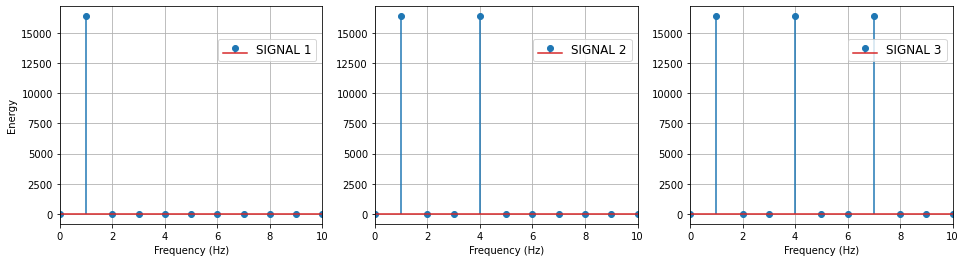

In [52]:
from numpy.fft import fft


# Find Fourier Transforms
signla_1_fft = fft(signal_1)
signla_2_fft = fft(signal_2)
signla_3_fft = fft(signal_3)

# Find the power spectrum density by squaring the module of FFT
S1 = np.abs(signla_1_fft)**2
S2 = np.abs(signla_2_fft)**2
S3 = np.abs(signla_3_fft)**2

# Drop the half symetric values
S1 = S1[:samples//2]
S2 = S2[:samples//2]
S3 = S3[:samples//2]


_ = plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.stem(S1, label=r"SIGNAL 1")
plt.xlim([0,10])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Energy")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 12})
plt.subplot(1,3,2)
plt.stem(S2, label=r"SIGNAL 2")
plt.xlim([0,10])
plt.xlabel("Frequency (Hz)")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 12})
plt.subplot(1,3,3)
plt.stem(S3, label=r"SIGNAL 3")
plt.xlim([0,10])
plt.xlabel("Frequency (Hz)")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 12})
plt.show()

### We can clearly see that all the frequencies in the signal are correctly represented in each case.

To show the effect of the amplitude of each frequency on the carried energy, we construct the last signal in which the amplitude of $f_2$ is **two times** more than the others and plot the power spectrum density.

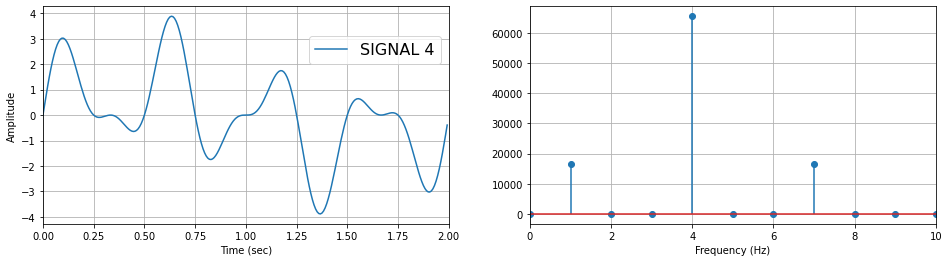

In [56]:
# The second frequency has an amplitude two times larger than the others
signal_4 = s1 + 2*s2 + s3
# next, we find the power spectrum
signla_4_fft = fft(signal_4)
S4 = np.abs(signla_4_fft)**2
S4 = S4[:samples//2]

# Finally plot them side by side
_ = plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(t, signal_4, label=r"SIGNAL 4")
plt.xlim([0,2])
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.subplot(1,2,2)
plt.stem(S4, label=r"SIGNAL 2")
plt.xlim([0,10])
plt.xlabel("Frequency (Hz)")
plt.grid()
plt.show()

### We see that $f_2 = 4$ carries **four times** more energy than the other twos. 

# Fourier Transform: Intro

> As we know, for a finite domain like $t \in [0, T]$, one can expand a piecewise-continuous function $f(t): [0,T] \to \mathbb{R}$ by cosine or sine series

<h3><center>$f(t) = \frac{A_0}{2} + \sum_{f=1}^{\infty} A_f \cos\frac{2\pi f t}{T}$.</center></h3>
or
<h3><center>$f(t) = \sum_{f =1}^{\infty} B_f \sin\frac{2\pi f t}{T}$,</center></h3>


> And for symmetric domains, or $t \in [-T, T]$, the full series exansion is used
<h3><center>$f(t) = \frac{A_0}{2} + \sum_{f=1}^{\infty} A_f \cos\frac{2\pi f t}{T} + B_f \sin\frac{2\pi f t}{T}$.</center></h3>

> Expanding a function is equivalent to finding the coefficients $A_f$ and $B_f$ analytically 
<h3><center>$A_f = \frac{2}{T} \int_{0}^{T} f(t) \cos\frac{2\pi f t}{T} dt, \qquad (f=0, 1, 2, \dots)$,</center></h3>
<h3><center>$B_f = \frac{2}{T} \int_{0}^{T} f(t) \sin\frac{2\pi f t}{T} dt, \qquad (f=1, 2, \dots)$.</center></h3>


> Similarly, for $t \in [-T, T]$ and the full series exansion, coefficients obtain by
<h3><center>$A_f = \frac{1}{T} \int_{-T}^{T} f(t) \cos\frac{2\pi f t}{T} dt, \qquad (f=0, 1, 2, \dots)$,</center></h3>
<h3><center>$B_f = \frac{1}{T} \int_{-T}^{T} f(t) \sin\frac{2\pi f t}{T} dt, \qquad (f=1, 2, \dots)$.</center></h3>
Note the limits of the integration and prefactors for the full series exansion.

> In general, $f(t)$ can be a complex function, so, we can write the expansion for complex functions too. And also even for real-valued functions we can use the complex expnasion, which is more compact and neat. To do so, remember the Euler equation $e^{i 2\pi f} = \cos(2\pi f) + i \sin(2\pi f)$ for $i = \sqrt{-1}$. Then, the full expansion rewrite as

<h3><center>$f(t) = \sum_{f =- \infty}^{\infty} C_f e^{i\frac{2\pi f t}{T}}$,</center></h3>
which the expansion coefficient $C_f$ is a complex number and the summation runs from $-\infty$ to $\infty$.


### Based on the demo at the start of this section and the complex expansion in the last equation, we understand that $S(f)$ equals $|C_f|^2$, or

<h3><center>$S(f) = |C_f|^2 = C_f \times C_f^{*}$</center></h3>

> Therefore, we know how to find the Fourier coefficients of a signal by using the Numpy FFT. 

# Autocorrelation

> Another common usage of FFT is in finding the autocorrelation of a signal. For example, let us say $R(\tau)$ is the signal's autocorrelation for lag $\tau$. Then, mathematically, it can be shown that $R(\tau)$ equals the inverse Fourier transform of the power spectrum density. 

<h3><center>$R(\tau) = \mathcal{F}^{-1}[S(f)]$</center></h3>


However, in practice, there are some more points that we need to consider to find the autocorrelation function correctly:

1. We must first centre the signal by subtracting the mean value.
2. To get the correct value for the autocovariance, we must scale the result by the length of the signal.

#### Let us do it here for a data set. We first calculate the autocorrelation directly and then use FFT to get the same result.

In [105]:
def autocovariance(signal, lag):
    """Find the auto-covariance of a signal
       Note that we use periodic boundary condition
       for our signal
    """
    l = len(signal)
    signal_1 = np.r_[signal[lag:], signal[:lag]]
    signal_2 = np.r_[signal[:l-lag], signal[l-lag:]]
    return np.mean([x*y for x,y in zip(signal_1, signal_2)])

def autocorr(signal, lag):
    """Find the auto-corelation of a signal
       Note that we use periodic boundary condition
       for our signal
    """
    l = len(signal)
    signal_1 = np.r_[signal[lag:], signal[:lag]]
    signal_2 = np.r_[signal[:l-lag], signal[l-lag:]]
    
    x_std = np.std(signal_1)
    y_std = np.std(signal_2)
    return np.mean([x*y/(x_std*y_std) for x,y in zip(signal_1, signal_2)])

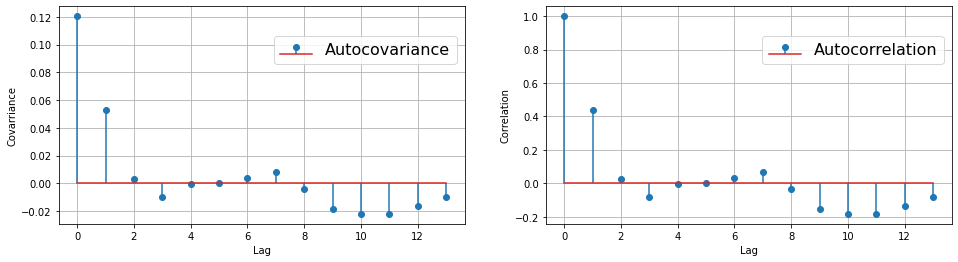

In [106]:

L = 128
max_lag = 14
lags = np.arange(max_lag)
# First create a random noise
noise = np.random.rand(L) 
# Then construct a signal that has autocorrelation by using auto-regression
data = noise + .5* np.r_[[0], noise[:-1]] + .1* np.r_[[0, 0], noise[:-2]]
# Center the signal
centered_data = data - np.mean(data)
# find both autocorrelations and autocovariance
# up the the last specified lag
auto_covar = [autocovariance(centered_data, lag) for lag in lags]
auto_corr = [autocorr(centered_data, lag) for lag in lags]

# Finally, plot them
_ = plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.stem(auto_covar, label=r"Autocovariance")
plt.xlabel("Lag")
plt.ylabel("Covarriance")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.subplot(1,2,2)
plt.stem(auto_corr, label=r"Autocorrelation")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.show()


### Alternativly, we can use FFT

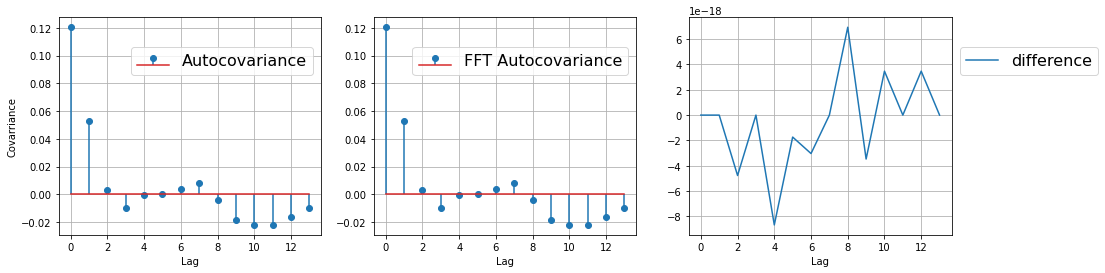

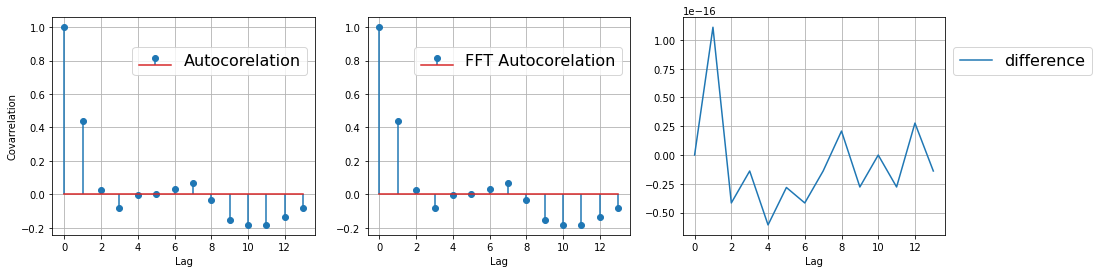

In [114]:
from numpy.fft import fft, ifft

# Find Fourier transform
F_f = fft(centered_data)
# Find the power spectrum density
S_f = F_f*np.conjugate(F_f)
# Find the autocovariance by inverse Fourier transform
R_t = ifft(S_f)
# select up to maximum lag, and then scales the value by signal size
R_t = R_t[:max_lag].real/L
# To make the Autocovariance to auto correlation, we need to divide
# all the values by the variance. The variance of the signal is
# in R_t[0]
R_corr_t = R_t/R_t[0]

_ = plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.stem(auto_covar, label=r"Autocovariance")
plt.xlabel("Lag")
plt.ylabel("Covarriance")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.subplot(1,3,2)
plt.stem(R_t, label=r"FFT Autocovariance")
plt.xlabel("Lag")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.subplot(1,3,3)
plt.plot(R_t-auto_covar, label=r"difference")
plt.xlabel("Lag")
plt.grid()
plt.legend(loc=6, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.show()

_ = plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.stem(auto_corr, label=r"Autocorelation")
plt.xlabel("Lag")
plt.ylabel("Covarrelation")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.subplot(1,3,2)
plt.stem(R_corr_t, label=r"FFT Autocorelation")
plt.xlabel("Lag")
plt.grid()
plt.legend(loc=7, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.subplot(1,3,3)
plt.plot(R_corr_t-auto_corr, label=r"difference")
plt.xlabel("Lag")
plt.grid()
plt.legend(loc=6, bbox_to_anchor=(1., 0.8), prop={'size': 16})
plt.show()